In [53]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [54]:
model = cv2.dnn.readNetFromCaffe(
    'models/deploy.prototxt', 'models/res10_300x300_ssd_iter_140000.caffemodel')

In [55]:
image = cv2.imread("images/full_happy.jpeg")
base_img = image.copy()
original_size = base_img.shape
target_size = (300, 300)
image = cv2.resize(image, target_size)
aspect_ratio_x = (original_size[1] / target_size[1])
aspect_ratio_y = (original_size[0] / target_size[0])

In [56]:
blob = cv2.dnn.blobFromImage(image)
model.setInput(blob)
detections = model.forward()[0][0]

In [57]:
column_labels = ["img_id", "is_face", "confidence", "left", "top", "right", "bottom"]
detections_df = pd.DataFrame(detections, columns = column_labels)
detections_df

,img_id,is_face,confidence,left,top,right,bottom
0,0.0,1.0,0.999972,0.314782,0.286212,0.728175,0.664383
1,0.0,1.0,0.117797,4.168429,4.012300,4.842606,4.987331
2,0.0,1.0,0.115152,4.018645,0.126271,4.973447,0.872927
3,0.0,1.0,0.114292,0.154351,4.012766,0.829668,4.988664
4,0.0,1.0,0.110911,0.022584,0.120372,0.974985,0.869207
...,...,...,...,...,...,...,...
195,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
196,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
197,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
198,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [58]:
best_face = detections[0]
is_face = best_face[1]
confidence = best_face[2]
bb = (best_face[-4:]*300).astype(int)
print(bool(is_face))
confidence

True


0.99997234

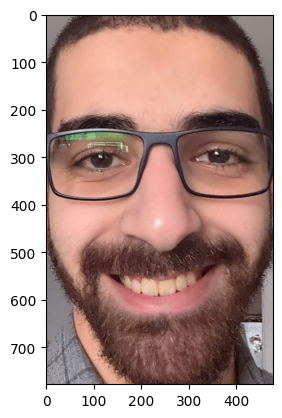

In [59]:
left, top, right, bottom = bb
detected_face = base_img[int(top*aspect_ratio_y):int(bottom*aspect_ratio_y) ,
    int(left*aspect_ratio_x):int(right*aspect_ratio_x)]
plt.imshow(detected_face[:, :, ::-1])